<a href="https://colab.research.google.com/github/william-monroy/Obtencion-de-Estadistica-Descriptiva/blob/master/Patrones_con_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad Evaluable: Patrones con K-means**

*Equipo 4 - Integrantes:*

*William Frank Monroy Mamani - A00829796*

*José Moisés López Alanís - A01284506*

*Sergio Eduardo Chavez Villegas - A01284297*

*Ezequiel Lozano Guerrero - A01734172*

*Jose Manuel Caceres Esponda - A00831382*


Text(0.5, 1, 'Correlación de variables')

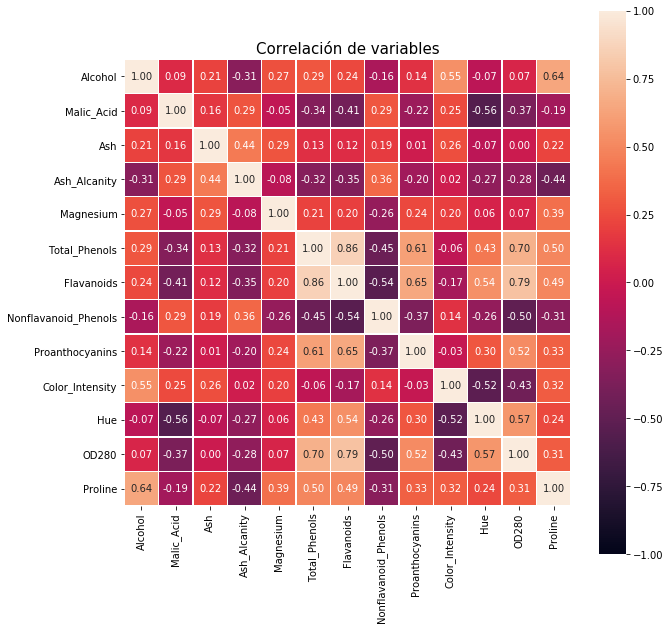

In [80]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
dataset = pd.read_csv('wine-clustering.csv')
dataset.head()


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(correlacion, annot= True, fmt= '.2f', square=True, linewidths= 0.5, vmin=-1, vmax=1).set_title('Correlación de variables', fontsize =15)

## **Selección de variables**


In [81]:
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset))

df = dataset.iloc[:,[0,2]].values

## **Valor de k**

Text(0.5, 1.0, 'Método del codo')

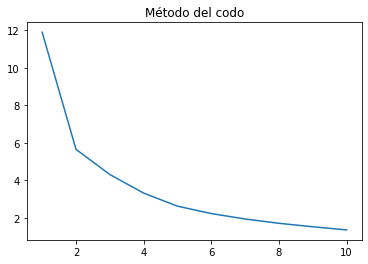

In [82]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
val=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    val.append(kmeans.inertia_)
plt.plot(range(1,11),val)
plt.title('Método del codo')

In [83]:
kmeans = KMeans(n_clusters=2, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(df)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0]


## **Visualizar clusters**

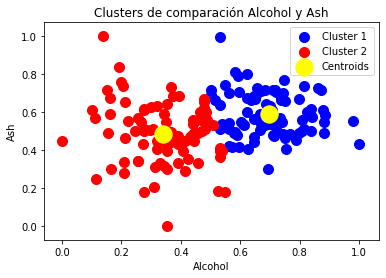

In [84]:
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s=100 , c ='blue', label='Cluster 1')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s=100 , c ='red', label='Cluster 2')
# plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s=100 , c ='magenta', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters de comparación Alcohol y Ash')
plt.xlabel('Alcohol')
plt.ylabel('Ash')
plt.legend()
plt.show()


## Si utilizaras más de dos variables, ¿Cuáles seleccionarías? Justifica tu respuesta.

 Observamos con el mapa de calor, las correlaciones de las diferentes variables y encontramos que la variable de Alcohol y de Ash tienen una correlación que se beneficiaría del análisis en clusters

## ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?


Si, porque la variación que tiene entre los datos de estos centros es óptima, después de haber probado con otros posicionamientos, el algoritmo pudo encontrar el mejor caso comparándolos.  

## ¿Hay centros que estén más cerca de otros? 

Si, gracias a que solo tenemos dos centros por la relación de las variables entre Ash que puede definir la calidad del vino y el porcentaje del alcohol.

## ¿Cómo obtuviste el valor de k a usar?

Con la ayuda de la tecnica punto codo pudimos observar donde estaba teniendo un cambio y de ahi agarrramos que nuestra k seria 2.

## ¿Tu valor de k sería mejor si utilizaras un valor más alto o más bajo? 


El valor de k si le aumentáramos tendría un cambio mínimo y haría que el cluster estuviera mas pequeño que antes y cada uno tendría menos como al contrario que si tenemos un valor bajo de la k seria mejor.


## ¿Qué pasaría con los clusters si tuviéramos muchos outliers en el análisis de cajas y bigotes?


Si aumentan los valores atípicos, los clusters tendrían una variación más grande entre los datos haciendo que describan de manera menos precisa el conjunto que intenta describir.


## ¿Qué puedes decir de los datos basándote en los clusters? ¿Qué conclusión puedes tener?


Los dos clusters que nos dieron representan el porcentaje del alcohol. El cluter azul (1) representa los vinos que tienen mayor porcentaje de alcohol y el cluster rojo (2) representa los vinos con menor porcentaje de alcohol. Dentro del cluster rojo (2) encontramos que había más vinos con menor nivel de ash, y el ash está fuertemente relacionado con la calidad de los vinos, por lo que el porcentaje bajo de alcohol tiende más a tener niveles bajos de ash y por ende, menor calidad. 